<a href="https://colab.research.google.com/github/Fallennnnnn/ID-X-Partner-Data-Scientist-Virtual-Internship/blob/main/Credit_Risk_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library**

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from google.colab import drive

**Data Preparation**

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
url = '/content/drive/MyDrive/loan_data_2007_2014.csv'
df = pd.read_csv(url, low_memory=False)

In [ ]:
df = pd.read_csv('/content/loan_data_2007_2014.csv', low_memory=False)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [93]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# Check Duplicated Row
df.duplicated().any()

False

In [95]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values.any()

True

In [96]:
# Copy the DataFrame
df = df.copy()

In [97]:
# Drop column that has > 70% NaN Values
threshold = len(df) * 0.7

# Drop columns with missing values more than the threshold
df_clean = df.dropna(axis=1, thresh=threshold)

In [98]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  466285 non-null  int64  
 1   id                          466285 non-null  int64  
 2   member_id                   466285 non-null  int64  
 3   loan_amnt                   466285 non-null  int64  
 4   funded_amnt                 466285 non-null  int64  
 5   funded_amnt_inv             466285 non-null  float64
 6   term                        466285 non-null  object 
 7   int_rate                    466285 non-null  float64
 8   installment                 466285 non-null  float64
 9   grade                       466285 non-null  object 
 10  sub_grade                   466285 non-null  object 
 11  emp_title                   438697 non-null  object 
 12  emp_length                  445277 non-null  object 
 13  home_ownership

In [99]:
# Check for missing values again
missing_values = df_clean.isnull().sum()
missing_values

Unnamed: 0                        0
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     27588
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            20
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths              

In [100]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [101]:
# Check value for loan_status
df_clean.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [102]:
# Define the categories for Excellent loans and bad loans
excellent_loan_statuses = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_statuses = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# Create a new column 'loan_category' to classify loans as 'Excellent' or 'Bad'
df['loan_category'] = df['loan_status'].apply(lambda x: 'Excellent' if x in excellent_loan_statuses else 'Bad')
df_clean = pd.concat([df_clean, df['loan_category']], axis=1)

# Count the occurrences of each loan category
loan_category_counts = df['loan_category'].value_counts()

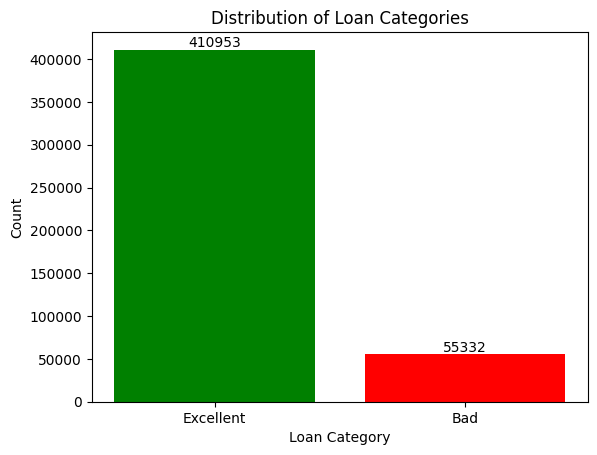

In [103]:
# Set colors for different loan categories
colors = ['green', 'red']

# Plot the distribution of loan categories
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.title('Distribution of Loan Categories')

# Add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [104]:
# Check remaining columns
df_clean.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_category'],
      dtype='object')

In [105]:
for column in df_clean.columns:
    value_counts = df_clean[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Unnamed: 0:
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: Unnamed: 0, Length: 466285, dtype: int64

Value counts for id:
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: id, Length: 466285, dtype: int64

Value counts for member_id:
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: member_id, Length: 466285, dtype: int64

Value counts for loan_amnt:
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: loan_amnt, Length: 1352, dtype: int64

Value counts for funded_amnt:
10000    32930
12000    25426
15000    23370
20000    22571
35000    16458
    

Policy code and application type is individual so we drop

In [106]:
# Drop Unecessary Column
unused_col = ['policy_code', 'application_type', 'Unnamed: 0', 'id', 'member_id','issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'zip_code', 'title', 'emp_title','loan_status']

drop_data = df_clean[unused_col]

df_clean.drop(columns=unused_col, axis=1, inplace=True)

In [107]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.4,4.0,f,Sep-13,0.0,0.0,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.5,10.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37.0,f,Jan-15,0.0,0.0,NaN,NaN,NaN,Excellent
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,53.9,38.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent


In [108]:
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq              

In [109]:
# List of columns for imputation
categorical_columns = ['emp_length', 'verification_status', 'earliest_cr_line', 'last_credit_pull_d']
numerical_columns = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
                    'collections_12_mths_ex_med', 'acc_now_delinq']

# Impute categorical columns with mode
for col in categorical_columns:
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)

# Impute numerical columns with median
for col in numerical_columns:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

In [110]:
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
last_credit_pull_d                0
collections_12_mths_ex_med        0
acc_now_delinq              

In [111]:
df_clean.duplicated().any()

False

<ipython-input-112-2977f61e99d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


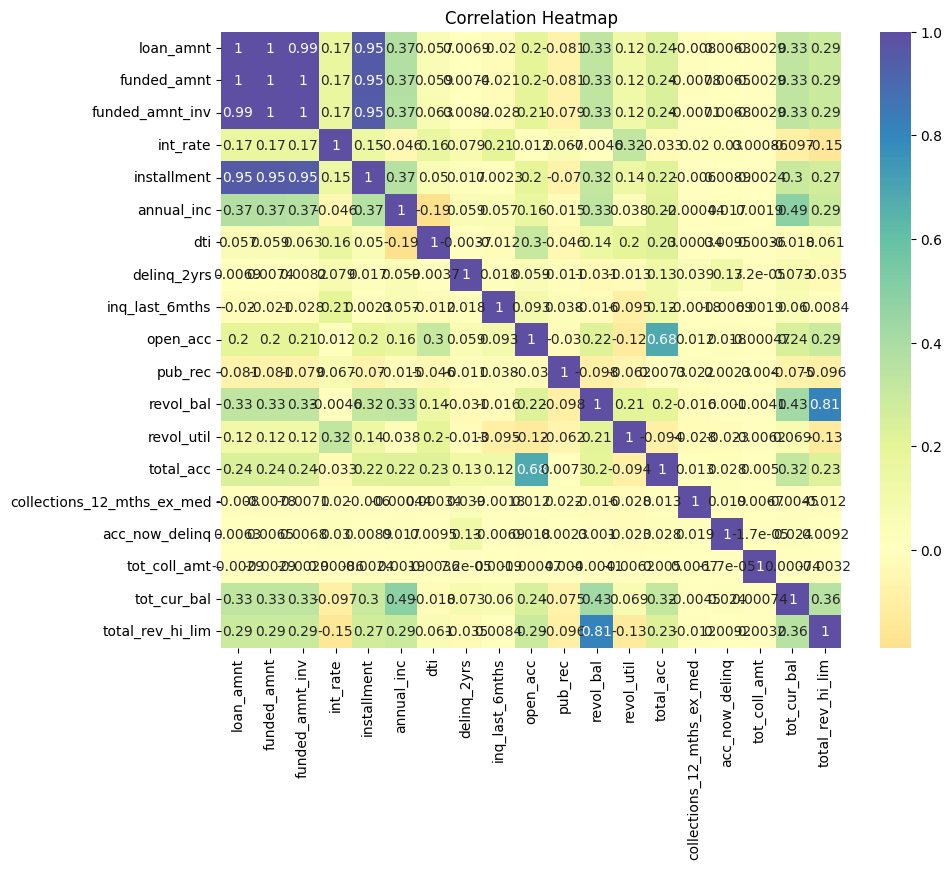

In [112]:
# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [113]:
# Similarity  Check
print(df_clean[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].describe())

           loan_amnt    funded_amnt  funded_amnt_inv
count  466285.000000  466285.000000    466285.000000
mean    14317.277577   14291.801044     14222.329888
std      8286.509164    8274.371300      8297.637788
min       500.000000     500.000000         0.000000
25%      8000.000000    8000.000000      8000.000000
50%     12000.000000   12000.000000     12000.000000
75%     20000.000000   20000.000000     19950.000000
max     35000.000000   35000.000000     35000.000000


In [114]:
unused_col2 = ['funded_amnt', 'funded_amnt_inv','url','pub_rec','installment', 'dti', 'revol_bal', 'total_acc','earliest_cr_line', 'last_credit_pull_d','initial_list_status','tot_coll_amt', 'sub_grade'
,'tot_cur_bal','total_rev_hi_lim','purpose', 'addr_state', ]
df_clean2 = df_clean.drop(columns = unused_col2)

In [115]:
df_clean2.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,delinq_2yrs,inq_last_6mths,open_acc,revol_util,collections_12_mths_ex_med,acc_now_delinq,loan_category
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Verified,0.0,1.0,3.0,83.7,0.0,0.0,Excellent
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,0.0,5.0,3.0,9.4,0.0,0.0,Bad
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,0.0,2.0,2.0,98.5,0.0,0.0,Excellent
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,0.0,1.0,10.0,21.0,0.0,0.0,Excellent
4,3000,60 months,12.69,B,1 year,RENT,80000.0,Source Verified,0.0,0.0,15.0,53.9,0.0,0.0,Excellent


<ipython-input-116-9158a7ebed1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean2.corr()


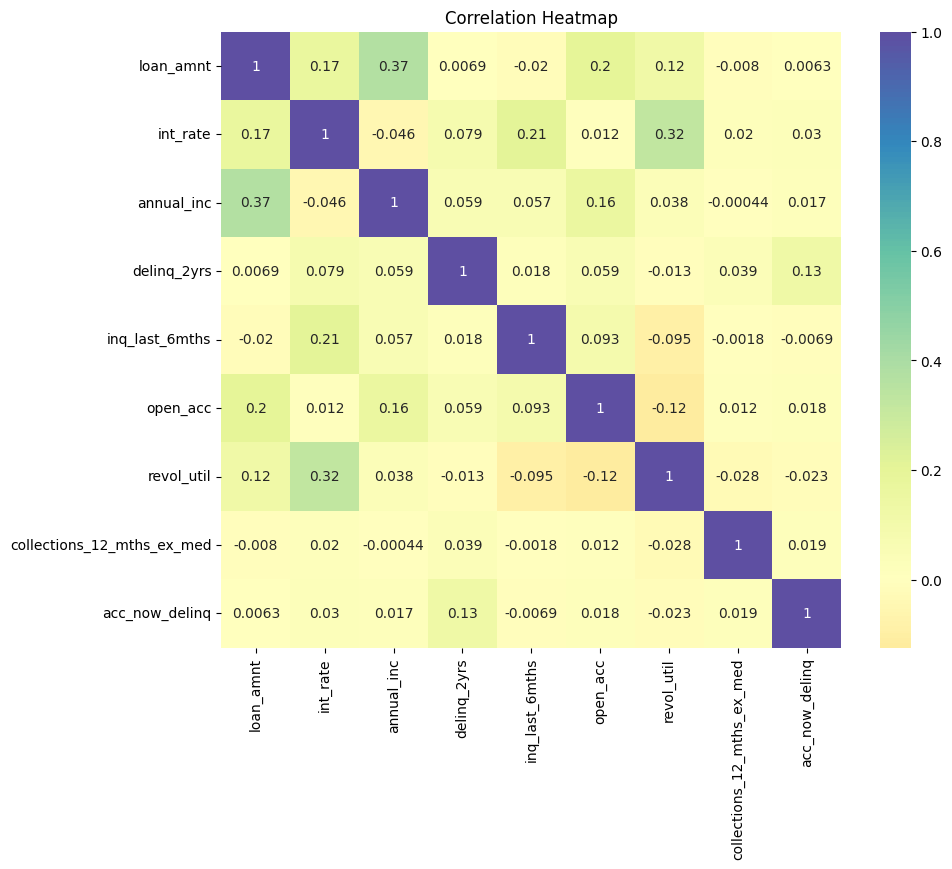

In [116]:
correlation_matrix = df_clean2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [117]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  object 
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   delinq_2yrs                 466285 non-null  float64
 9   inq_last_6mths              466285 non-null  float64
 10  open_acc                    466285 non-null  float64
 11  revol_util                  466285 non-null  float64
 12  collections_12_mths_ex_med  466285 non-null  float64
 13  acc_now_delinq

In [118]:
df_clean2.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.00,63000.00,88953.00,7500000.00
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.00,0.00,1.00,33.00
open_acc,466285.0,11.186995,4.987380,0.00,8.00,10.00,14.00,84.00
revol_util,466285.0,56.177985,23.724005,0.00,39.20,57.60,74.70,892.30
collections_12_mths_ex_med,466285.0,0.009082,0.108632,0.00,0.00,0.00,0.00,20.00
acc_now_delinq,466285.0,0.004002,0.068635,0.00,0.00,0.00,0.00,5.00


In [119]:
df_clean2['term'] = df_clean2['term'].apply(lambda x: int(x.split()[0]))
df_clean2['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [120]:
df_clean2['emp_length'] = df_clean2['emp_length'].str.extract('(\d+)').astype(int)
df_clean2['emp_length']

0         10
1          1
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length, Length: 466285, dtype: int64

In [121]:
encoded_verification = pd.get_dummies(df_clean2['verification_status'], prefix='verification', drop_first=True)
encoded_home_ownership = pd.get_dummies(df_clean2['home_ownership'], prefix='home', drop_first=True)
encoded_grade = pd.get_dummies(df_clean2['grade'], prefix='grade', drop_first=True)

# Combine the encoded features
encoded_categorical = pd.concat([encoded_verification,encoded_home_ownership, encoded_grade], axis=1)
df_clean2 = pd.concat([df_clean2, encoded_categorical], axis=1)

# Drop the original columns
df_clean2.drop(['verification_status','home_ownership', 'grade','term','emp_length'], axis=1, inplace=True)

In [122]:
df_clean2.head()

,loan_amnt,int_rate,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,revol_util,collections_12_mths_ex_med,acc_now_delinq,loan_category,...,home_NONE,home_OTHER,home_OWN,home_RENT,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,5000,10.65,24000.0,0.0,1.0,3.0,83.7,0.0,0.0,Excellent,...,0,0,0,1,1,0,0,0,0,0
1,2500,15.27,30000.0,0.0,5.0,3.0,9.4,0.0,0.0,Bad,...,0,0,0,1,0,1,0,0,0,0
2,2400,15.96,12252.0,0.0,2.0,2.0,98.5,0.0,0.0,Excellent,...,0,0,0,1,0,1,0,0,0,0
3,10000,13.49,49200.0,0.0,1.0,10.0,21.0,0.0,0.0,Excellent,...,0,0,0,1,0,1,0,0,0,0
4,3000,12.69,80000.0,0.0,0.0,15.0,53.9,0.0,0.0,Excellent,...,0,0,0,1,1,0,0,0,0,0


In [123]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     466285 non-null  int64  
 1   int_rate                      466285 non-null  float64
 2   annual_inc                    466285 non-null  float64
 3   delinq_2yrs                   466285 non-null  float64
 4   inq_last_6mths                466285 non-null  float64
 5   open_acc                      466285 non-null  float64
 6   revol_util                    466285 non-null  float64
 7   collections_12_mths_ex_med    466285 non-null  float64
 8   acc_now_delinq                466285 non-null  float64
 9   loan_category                 466285 non-null  object 
 10  verification_Source Verified  466285 non-null  uint8  
 11  verification_Verified         466285 non-null  uint8  
 12  home_MORTGAGE                 466285 non-nul

In [124]:
df_clean2['loan_category'].value_counts()

Excellent    410953
Bad           55332
Name: loan_category, dtype: int64

In [125]:
# Define features (X) and target variable (Y)
X = df_clean2.drop('loan_category', axis=1)  # Features
Y = df_clean2['loan_category']  # Target variable

# Get the column names as feature names
feature_names = X.columns.tolist()

In [126]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [141]:
# Initialize different models
results = {}
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Initialize dictionary to store classification reports
classification_reports = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, Y_train)

    print(f"Evaluating {model_name}...")
    Y_pred = model.predict(X_test)

    confusion = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(
        Y_test, Y_pred, target_names=['Good', 'Bad'], zero_division=1  # Handle zero division
    )

    # Store the classification report in the dictionary
    classification_reports[model_name] = classification_rep

    accuracy = accuracy_score(Y_test, Y_pred)

    print("\nClassification Report:")
    print(classification_rep)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print("=" * 50)

Training Random Forest...
Evaluating Random Forest...

Classification Report:
              precision    recall  f1-score   support

        Good       0.33      0.01      0.01     16739
         Bad       0.88      1.00      0.94    123147

    accuracy                           0.88    139886
   macro avg       0.60      0.50      0.48    139886
weighted avg       0.81      0.88      0.83    139886

Random Forest Accuracy: 0.8794
Training Logistic Regression...
Evaluating Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.00      0.00     16739
         Bad       0.88      1.00      0.94    123147

    accuracy                           0.88    139886
   macro avg       0.94      0.50      0.47    139886
weighted avg       0.89      0.88      0.82    139886

Logistic Regression Accuracy: 0.8803
Training Decision Tree...
Evaluating Decision Tree...

Classification Report:
              precision    recal

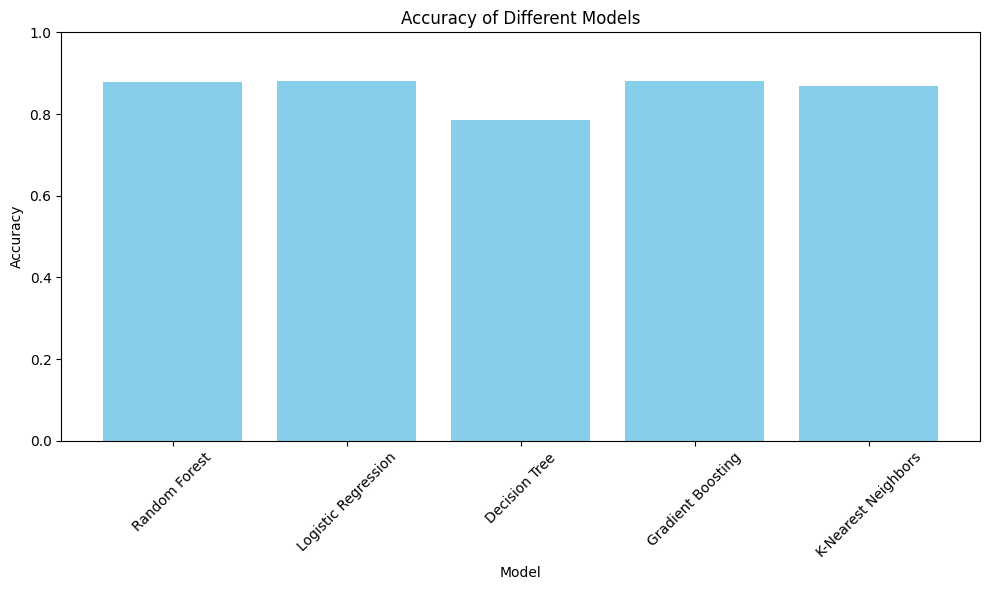

In [142]:
# Create a bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()